In [100]:
from __future__ import division, print_function

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import os
import json
from pprint import pprint
from results import read_results, flatten_json

In [150]:
# os.chdir('./0project/MScThesis/')
results_path = '../bucket/results/'
results_files = os.path.join(results_path, 'result_*.json')

graphs_path = '../'

figures_path = '/Users/hmourit/Dropbox/MSc Thesis/figures'
graphs_path = figures_path
os.getcwd()

'/Users/hmourit/Documents/0project/MScThesis'

In [ ]:
# results = json.load(open('./results/results.json', 'r'))
# results = pd.io.json.json_normalize(results)
# results['target'] = results.target.fillna('drug')
# results

In [ ]:
# temp = results[results['split.test_size'] == 0.1][results['classifier'] == 'EN']
# temp = temp[['split.n_iter', 'cross_val.n_folds', 'results.accuracy.mean', 'results.accuracy.std', 'target']]
# temp[temp['target'] == 'drug']

In [ ]:
# temp = results[results['classifier'] == 'SVC']
# temp = temp[['split.test_size', 'split.n_iter', 'cross_val.n_folds', 'results.accuracy.mean', 'results.accuracy.std', 'target']]
# temp[temp['target'] == 'drug']

In [ ]:
# keys = ['classifier', 'cross_val.n_folds', 'split.test_size', 'target']
keys = ['classifier', 'target']

In [ ]:
# def combine_means_and_stds(results, keys):
# results['n*mu'] = results['split.n_iter'] * results['results.accuracy.mean']
# results['ns2m2'] = results['split.n_iter'] * \
#     (results['results.accuracy.std']**2 + results['results.accuracy.mean']**2)
# aggregated = results.groupby(keys).agg(np.sum)
# aggregated['mean'] = aggregated['n*mu'] / aggregated['split.n_iter']
# aggregated['variance'] = (aggregated['ns2m2'] - aggregated['mean']**2 * aggregated['split.n_iter']) / aggregated['split.n_iter']
# aggregated['std'] = np.sqrt(aggregated['variance'])
# aggregated[['split.n_iter', 'mean', 'std']]

In [ ]:
# pprint(aggregated[['split.n_iter', 'mean', 'std']].to_json())

In [ ]:
combine_means_and_stds(results, keys)

In [ ]:
aggregated = grouped.agg(np.sum)
aggregated

In [ ]:
aggregated['new_mu'] = aggregated['n*mu'] / aggregated['split.n_iter']
aggregated

In [ ]:
results.join(aggregated['new_mu'], on=['classifier', 'cross_val.n_folds', 'split.test_size', 'target'])

In [ ]:
foo = np.random.normal(0.414286, 0.162255, (10,))
print(foo.mean(), foo.std())
foo2 = (foo - foo.mean()) / foo.std()
print(foo2.mean(), foo2.std())
foo3 = (foo2 * 0.162255) + 0.414286
print(foo3.mean(), foo3.std())

In [112]:
def fake_scores(n, mu, std):
    fake = np.random.normal(mu, std, (n,))
    fake = (fake - fake.mean()) / fake.std()
    fake = fake * std + mu
    return fake

In [113]:
results = json.load(open(os.path.join(results_path, 'results.json'), 'r'))
for result in results:
    experiment_id = hash(json.dumps(result))
    result['experiment_id'] = experiment_id
    result['data'] = 'mdd_transcriptomics'
    if 'target' not in result:
        result['target'] = 'drug'
    n = result['split']['n_iter']
    mu = result['results']['accuracy']['mean']
    std = result['results']['accuracy']['std']
    result['results']['accuracy']['scores'] = fake_scores(n, mu, std).tolist()
    with open(os.path.join(results_path, 'result_{}.json'.format(experiment_id)), 'w') as out:
        json.dump(result, out, sort_keys=True, indent=2, separators=(',', ': '))

In [ ]:
# file_ = os.path.join(results_path, 'results_new.json')
# experiments = {}
# results = json.load(open(file_, 'r'))
# for result in results:
#     if result['experiment_id'] not in experiments:
#         experiments[result['experiment_id']] = result
#         result['results'] = {'accuracy': {'scores': []}}
#     experiments[result['experiment_id']]['resultbs']['accuracy']['scores'].append(result['accuracy'])

# for experiment in experiments.values():
#     experiment['results']['accuracy']['mean'] = np.mean(experiment['results']['accuracy']['scores'])
#     experiment['results']['accuracy']['std'] = np.std(experiment['results']['accuracy']['scores'])
#     del experiment['accuracy']
#     if 'data' not in experiment:
#         experiment['data'] = 'mdd_transcriptomics'
#     with open(os.path.join(results_path, 'result_{}.json'.format(experiment['experiment_id'])), 'w') as out:
#         json.dump(experiment, out, sort_keys=True, indent=2, separators=(',', ': '))

In [156]:
results = read_results(results_files, record_path='results.accuracy.scores')
results['classifier'].replace('SVC', 'SVM')
results['classifier'].replace('svm', 'SVM')
results.head()

,classifier,cross_val.n_folds,cross_val.shuffle,cross_val.type,data,experiment_id,pca.n_components,results.accuracy.mean,results.accuracy.scores,results.accuracy.std,results.time,split.n_iter,split.test_size,split.type,std_select.n_feat,target,time
0,logit,10,NaN,NaN,NaN,-1008626272003486614,40,0.788,0.866667,0.099501,NaN,100,0.1,StratifiedShuffleSplit,NaN,stress,0:01:11
1,logit,10,NaN,NaN,NaN,-1008626272003486614,40,0.788,0.933333,0.099501,NaN,100,0.1,StratifiedShuffleSplit,NaN,stress,0:01:11
2,logit,10,NaN,NaN,NaN,-1008626272003486614,40,0.788,0.733333,0.099501,NaN,100,0.1,StratifiedShuffleSplit,NaN,stress,0:01:11
3,logit,10,NaN,NaN,NaN,-1008626272003486614,40,0.788,0.600000,0.099501,NaN,100,0.1,StratifiedShuffleSplit,NaN,stress,0:01:11
4,logit,10,NaN,NaN,NaN,-1008626272003486614,40,0.788,0.866667,0.099501,NaN,100,0.1,StratifiedShuffleSplit,NaN,stress,0:01:11


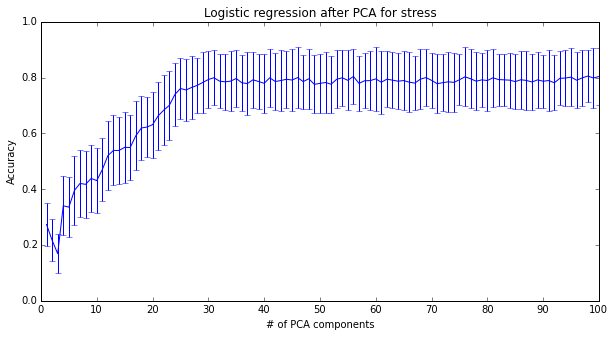

In [151]:
group_keys = ['classifier', 'target', 'pca.n_components']
results['classifier'] = results['classifier'].replace('SVC', 'svm')
summary = results.groupby(group_keys).agg({'results.accuracy.scores': [len, np.mean, np.std]})
summary = summary.loc[('logit', 'stress'), ('results.accuracy.scores')]
plt.figure(figsize=(10, 5))
summary['mean'].plot(yerr=summary['std'])
plt.title('Logistic regression after PCA for stress')
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, max(summary.index)+1, 10))
plt.savefig(os.path.join(graphs_path, 'accu_vs_pca_components.eps'))

In [141]:
summ = results[(results['pca.n_components'].isnull())]
summ = summ.rename(columns={'results.accuracy.scores': 'Accuracy'})
keys = ['classifier', 'target']
# keys = ['classifier', 'split.test_size', 'target']
summ = summ.groupby(keys).agg({'Accuracy': [len, np.mean, np.std]})
summ

Accuracy                    
                       len      mean       std
classifier target                             
EN         drug         60  0.338995  0.042689
           stress       50  0.377333  0.081494
logit      stress     1200  0.430667  0.142941
svm        drug         70  0.387680  0.113130
           stress      100  0.801500  0.097373

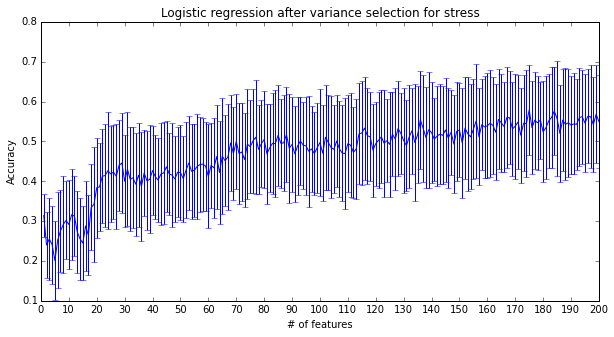

In [157]:
summ = results[results['std_select.n_feat'].notnull()]
summ = summ.rename(columns={'results.accuracy.scores': 'Accuracy'})
group_keys = ['classifier', 'target', 'std_select.n_feat']
summ = summ.groupby(group_keys).agg({'Accuracy': [len, np.mean, np.std]})
summ = summ.loc[('logit', 'stress'), ('Accuracy')]
plt.figure(figsize=(10, 5))
summ['mean'].plot(yerr=summ['std'])
plt.title('Logistic regression after variance selection for stress')
plt.xlabel('# of features')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, max(summ.index)+1, 10))
plt.savefig(os.path.join(graphs_path, 'accu_vs_std_features.eps'))